# Does Comfort Matter More than Price?
Car reviews reflect consumer preferences and influence future buyers. Analyzing sentiment in these reviews can help understand what aspects of a car matter most to customers.

The central hypothesis of this project is that people care more about **comfort** than **price** when reviewing cars.


## Dataset
This project code is analysing a collection of 15 car review texts that were collected last year, from Autocar India, CarWale, and Indian Autos Blog.

Rather than follow the 200 word-limit the corpus project required, this time the entirety of the reviews are taken.

## Analysis
There are two analyses performed here. A sentiment analysis and frequent word analysis.

### 1. Importing Relevant Libraries and Modules

In [ ]:
import os
from google.colab import files
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the `.txt` Files:

In [ ]:
print("Upload your Text Corpus Files (.txt):")
uploaded = files.upload()

Upload your Text Corpus Files (.txt):


Saving CR1.txt to CR1.txt
Saving CR2.txt to CR2.txt
Saving CR3.txt to CR3.txt
Saving CR4.txt to CR4.txt
Saving CR5.txt to CR5.txt
Saving CR6.txt to CR6.txt
Saving CR7.txt to CR7.txt
Saving CR8.txt to CR8.txt
Saving CR9.txt to CR9.txt
Saving CR10.txt to CR10.txt
Saving CR11.txt to CR11.txt
Saving CR12.txt to CR12.txt
Saving CR13.txt to CR13.txt
Saving CR14.txt to CR14.txt
Saving CR15.txt to CR15.txt


### 3. Sentiment Anlysis:

1.   **Document Level**: To compute the sentiment for entire reviews, and return it as a signle sentiment score per file, thus summarising the overall tone.
2.   **Aspect-Level & Sentence-Level**: To compute the sentiments for only those sentences mentioning the aspects "comfort" and "price", and return one sentiment score per aspect per file.



In [ ]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
file_sentiments = []

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()

    scores = sia.polarity_scores(text)

    file_sentiments.append({
        'Filename': filename,
        'Negative': scores['neg'],
        'Neutral': scores['neu'],
        'Positive': scores['pos'],
        'Compound': scores['compound']
    })

df = pd.DataFrame(file_sentiments)

df.to_csv("document_level_sentiment.csv", index=False)
print("Document-level sentiment analysis complete! Results saved as 'document_level_sentiment.csv'.")
print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Document-level sentiment analysis complete! Results saved as 'document_level_sentiment.csv'.
    Filename  Negative  Neutral  Positive  Compound
0    CR1.txt     0.063    0.853     0.085    0.9912
1    CR2.txt     0.046    0.813     0.141    0.9998
2    CR3.txt     0.050    0.813     0.137    0.9969
3    CR4.txt     0.028    0.784     0.188    0.9995
4    CR5.txt     0.034    0.815     0.151    0.9997
5    CR6.txt     0.033    0.880     0.087    0.9969
6    CR7.txt     0.023    0.862     0.115    0.9970
7    CR8.txt     0.015    0.885     0.100    0.9965
8    CR9.txt     0.033    0.862     0.106    0.9984
9   CR10.txt     0.028    0.830     0.142    0.9957
10  CR11.txt     0.025    0.828     0.147    0.9994
11  CR12.txt     0.019    0.855     0.126    0.9993
12  CR13.txt     0.033    0.856     0.112    0.9996
13  CR14.txt     0.018    0.856     0.127    0.9995
14  CR15.txt     0.035    0.837     0.128    0.9997


In [ ]:
def analyze_aspect_sentiment(text, aspect):
    sentences = text.split(".")
    aspect_scores = []

    for sentence in sentences:
        if aspect in sentence.lower():
            sentiment = sia.polarity_scores(sentence)
            aspect_scores.append(sentiment["compound"])

    return sum(aspect_scores) / len(aspect_scores) if aspect_scores else None

file_sentiments_aspect = []

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()

    comfort_sentiment = analyze_aspect_sentiment(text, "comfort")
    price_sentiment = analyze_aspect_sentiment(text, "price")

    file_sentiments_aspect.append({
        'Filename': filename,
        'Comfort Sentiment': comfort_sentiment,
        'Price Sentiment': price_sentiment
    })

df_aspect = pd.DataFrame(file_sentiments_aspect)

df_aspect.to_csv("aspect_level_sentiment.csv", index=False)
print("Aspect-level sentiment analysis complete! Results saved as 'aspect_level_sentiment.csv'.")
print(df_aspect)

Aspect-level sentiment analysis complete! Results saved as 'aspect_level_sentiment.csv'.
    Filename  Comfort Sentiment  Price Sentiment
0    CR1.txt           0.550433          0.36195
1    CR2.txt           0.536767          0.40190
2    CR3.txt           0.510600         -0.52670
3    CR4.txt           0.583700          0.42150
4    CR5.txt           0.790600          0.00000
5    CR6.txt           0.720333          0.11010
6    CR7.txt                NaN              NaN
7    CR8.txt           0.569600              NaN
8    CR9.txt           0.674900          0.16060
9   CR10.txt           0.875000         -0.15310
10  CR11.txt           0.557400          0.00000
11  CR12.txt           0.667250          0.38420
12  CR13.txt           0.338400              NaN
13  CR14.txt           0.842633          0.00000
14  CR15.txt           0.463300              NaN


**Visualisation:**
This section of code visualizes the sentiment distribution across different text files.

A bar chart is then created where each file is represented on the x-axis, and sentiment scores are plotted on the y-axis. The different sentiment categories are color-coded as specified in the legend.

This visualization provides a clear, comparative overview of how each document is perceived in terms of sentiment.

1.   **Document-Level Sentiments**: This section of the code visualizes the sentiment polarity of each text file by focusing only on positive and negative sentiment scores, omitting the neutral category.
2.   **Aspect-Level Sentiments**: This section too focuses only on the positive and negative sentiment score, but does so for comfort and price separately.

This visualization provides a clearer understanding of how each document leans emotionally, helping to identify trends in sentiment distribution across the dataset.



<Figure size 1000x500 with 0 Axes>

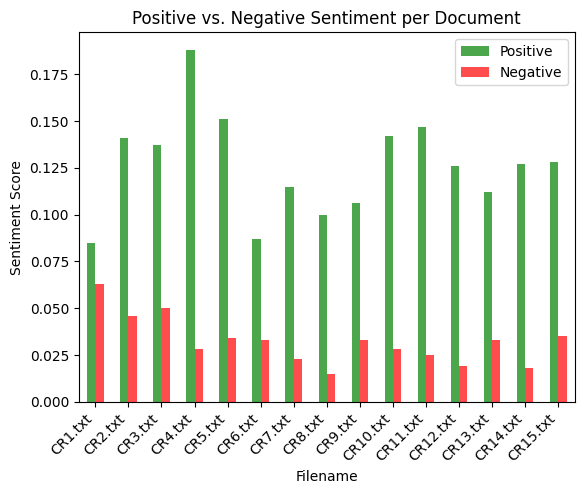

In [ ]:
df = pd.read_csv("document_level_sentiment.csv")

plt.figure(figsize=(10, 5))
df.set_index("Filename")[["Positive", "Negative"]].plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title("Positive vs. Negative Sentiment per Document")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45, ha="right")
plt.legend(["Positive", "Negative"])
plt.show()

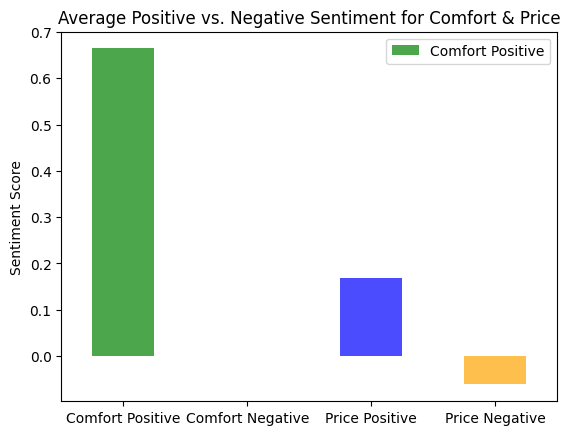

In [ ]:
df_aspect = pd.read_csv("aspect_level_sentiment.csv")

df_aspect = df_aspect.dropna(subset=['Comfort Sentiment', 'Price Sentiment'])

df_aspect["Comfort Positive"] = df_aspect["Comfort Sentiment"].apply(lambda x: max(x, 0))
df_aspect["Comfort Negative"] = df_aspect["Comfort Sentiment"].apply(lambda x: min(x, 0))

df_aspect["Price Positive"] = df_aspect["Price Sentiment"].apply(lambda x: max(x, 0))
df_aspect["Price Negative"] = df_aspect["Price Sentiment"].apply(lambda x: min(x, 0))

df_aspect[["Comfort Positive", "Comfort Negative", "Price Positive", "Price Negative"]].mean().plot(
    kind='bar', color=['green', 'red', 'blue', 'orange'], alpha=0.7
)
plt.title("Average Positive vs. Negative Sentiment for Comfort & Price")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=0)
plt.legend(["Comfort Positive", "Comfort Negative", "Price Positive", "Price Negative"])
plt.show()

### 4. Frequent Word Analysis  

To identify the most frequently occurring words in the uploaded text files while filtering out common words that do not add significant meaning.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

custom_stopwords = {"bit","though","certainly","goes","car", "also", "even", "however", "feels", "driving", "drives", "makes", "quitembit", "two", "without", "one", "around", "like", "would", "making", "especially", "something", "comes"}
all_words = []

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()

    words = nltk.word_tokenize(text.lower())
    stopwords = set(nltk.corpus.stopwords.words('english')).union(custom_stopwords)
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords]
    all_words.extend(filtered_words)

word_freq = Counter(all_words)
common_words = word_freq.most_common(100)

word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
word_df.to_csv("word_frequencies.csv", index=False)

print("\nTop 100 most frequent words:")
print(word_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Top 100 most frequent words:
         Word  Frequency
0        rear         58
1         new         52
2       front         50
3      engine         45
4          ev         44
..        ...        ...
95  functions         14
96       gear         14
97    quality         14
98    display         14
99    seconds         14

[100 rows x 2 columns]


**Visualisation:**

To complement the word frequency analysis, a word cloud is generated to provide a visual representation of the most common words in the text dataset. The size of each word corresponds to its frequency in the corpus.   

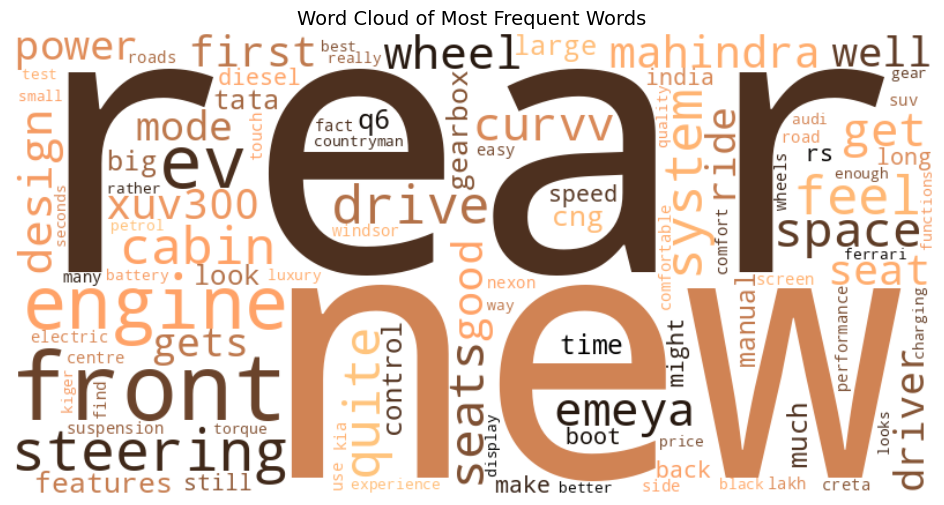

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='copper', max_words=100, contour_color='black', contour_width=2).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words", fontsize=14)
plt.show()

## Conclusion


1. It is evident that positive sentiment consistently outweighs negative sentiment in all documents. The presence of some negative sentiment indicates that reviewers do express concerns, but these do not overshadow the overall positive tone.
2. The significantly higher positive sentiment score for comfort suggests that consumers prioritize a smooth and pleasant driving experience over financial considerations when evaluating a vehicle. While price is mentioned, it receives a much lower positive sentiment score, reinforcing the idea that affordability is a concern but not as influential in shaping overall satisfaction. This finding supports the hypothesis that comfort matters more to people than price in their car-buying decisions.
3. The wordcloud suggests that car buyers prioritize elements related to comfort, driving experience, and vehicle design. Mentions of seating, cabin space, and ride quality indicate a strong emphasis on comfort, while discussions around performance-related aspects such as handling, power, and driving dynamics suggest that users also value the overall driving experience.